## Introduction
In this project it is implemented three different classifiing algorithms being 
- Nearest Neighbors
- Least Squares
- Minimum error rate

A classifier is then trained for each three datasets being splitted in train and test sets as described in the [project description](../README.md)

The evaluation metrics used for evaluating the classifiers is error rate estimate, as it is described in the project description section [Datasett](../README.md#4-evaluation)

For the first part each classifier is implemented and trained on the datasets 1 for using all features. 
For the code implementaition of the classifiers, refer to the [classifier module](classifiers.py).

For the second part, for each datasett nearest neighbors classifier is used to find the error rate for all combinations of features as described in [5](../README.md#5-execution-of-the-assignment)

Then for the combination of features with the lowest error rate, a ranking of the the classifiers is done based on the error rate estimate.

In [45]:
from tek5020_p1.utils import *
from tek5020_p1.preprocessing import train_test_split
from tek5020_p1.classifiers import (MinimumErrorRateClassifier,
                                    LeastSquaresClassifier,
                                    NearestNeighborClassifier,
                                    estimate_prior_probabilities,
                                )
import matplotlib.pyplot as plt
import numpy as np
import itertools
import sys
import os
from tek5020_p1.evaluation import evaluate_classifiers



current_working_dir = os.getcwd()
# Change to root directory

print("Updated Working Directory Path: ", current_working_dir)


Updated Working Directory Path:  c:\Users\javid.rezai\CSMaster\TEK5020\TEK5020-P1\tek5020_p1


In [46]:
file  = "../data/ds-1.txt"
X,y = load_dataset(file)

X_train, y_train,X_test, y_test = train_test_split(X, y)

prior_probabilities = estimate_prior_probabilities(y_train)

print("Prior Probabilities: ", prior_probabilities)

Prior Probabilities:  {1: 0.5, 2: 0.5}


## Part 1 - Classifiers

### Minimum Error Rate classification

In [47]:
MER_classifier = MinimumErrorRateClassifier()
MER_classifier.fit(X_train, y_train)
MER_predictions = MER_classifier.predict(X_test)
error_rate_MER_classifer = error_rate_estimate(MER_predictions, y_test)
print("Minimum Error Rate Classifier Error Rate: ", error_rate_MER_classifer)

Minimum Error Rate Classifier Error Rate:  0.08


### Leaset Squares classification


In [48]:
LS_classifier = LeastSquaresClassifier()
LS_classifier.fit(X_train, y_train)
LS_predictions = LS_classifier.predict(X_test)
error_rate_LS_classifer = error_rate_estimate(LS_predictions, y_test)
print("Least Squares Classifier Error Rate: ", error_rate_LS_classifer)

Least Squares Classifier Error Rate:  0.07333333333333333


### NN classification

In [49]:
NN_classifier = NearestNeighborClassifier()
NN_classifier.fit(X_train, y_train)
NN_predictions = NN_classifier.predict(X_test)
error_rate_NN_classifer = error_rate_estimate(NN_predictions, y_test)
print("Nearest Neighbor Classifier Error Rate: ", error_rate_NN_classifer)

Nearest Neighbor Classifier Error Rate:  0.09333333333333334


## Part 2 - Model ranking

In [50]:
datasets = {
    'Dataset_1': '../data/ds-1.txt',
    'Dataset_2': '../data/ds-2.txt',
    'Dataset_3': '../data/ds-3.txt'
}

In [ ]:
for name, file_path in datasets.items():
    print(f"{name}")
    X, y = load_dataset(file_path)
    num_features = X.shape[1]
    
    # Feature combination rankings based on Nearest Neighbor
    feature_rankings = {}
    for d in range(1, num_features + 1):
        combinations = itertools.combinations(range(num_features), d)
        error_list = []
        for combo in combinations:
            errors = evaluate_classifiers(X, y, combo)
            error_nn = errors['NN']
            error_list.append({'features': combo, 'error_NN': error_nn})
        sorted_errors = sorted(error_list, key=lambda x: x['error_NN'])
        

        best_combo = sorted_errors[0]
        second_best_combo = sorted_errors[1] if len(sorted_errors) > 1 else None
        worst_combo = sorted_errors[-1]
        
        feature_rankings[d] = {
            'best': best_combo,
            'second_best': second_best_combo,
            'worst': worst_combo
        }
        
        print(f"Feature dimension d={d}:")
        print(f"  Best combination: {best_combo['features']} with NN error rate {best_combo['error_NN']}")
        if second_best_combo:
            print(f"  Second best combination: {second_best_combo['features']} with NN error rate {second_best_combo['error_NN']}")
        print(f"  Worst combination: {worst_combo['features']} with NN error rate {worst_combo['error_NN']}")
    
    # Classifier rankings for best feature combinations
    for d, info in feature_rankings.items():
        best_features = info['best']['features']
        errors = evaluate_classifiers(X, y, best_features)
        
        sorted_classifiers = sorted(errors.items(), key=lambda x: x[1])
 
        best_classifier = sorted_classifiers[0]
        second_best_classifier = sorted_classifiers[1] if len(sorted_classifiers) > 1 else None
        worst_classifier = sorted_classifiers[-1]
        
        print(f"\nClassifier rankings for feature dimension d={d}:")
        print(f"  Best classifier: {best_classifier[0]} with error rate {best_classifier[1]}")
        if second_best_classifier:
            print(f"  Second best classifier: {second_best_classifier[0]} with error rate {second_best_classifier[1]}")
        print(f"  Worst classifier: {worst_classifier[0]} with error rate {worst_classifier[1]}")
    print("\n")

Dataset_1


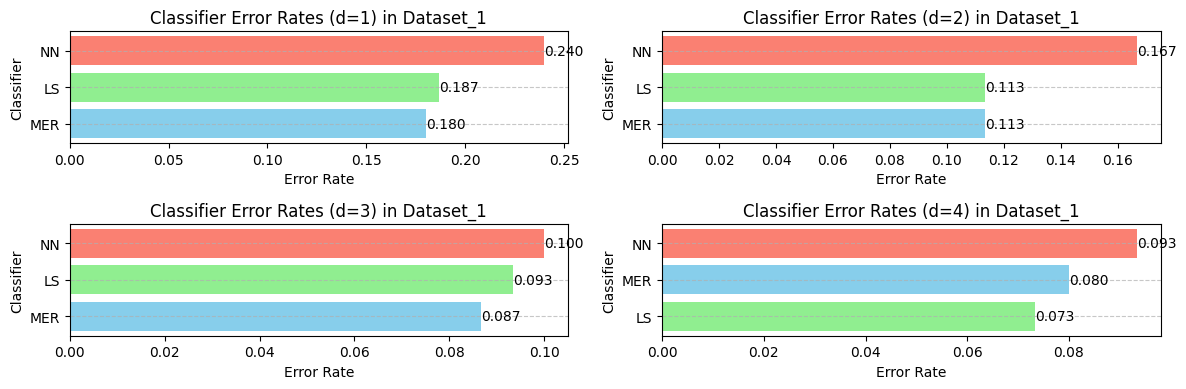

Dataset_2


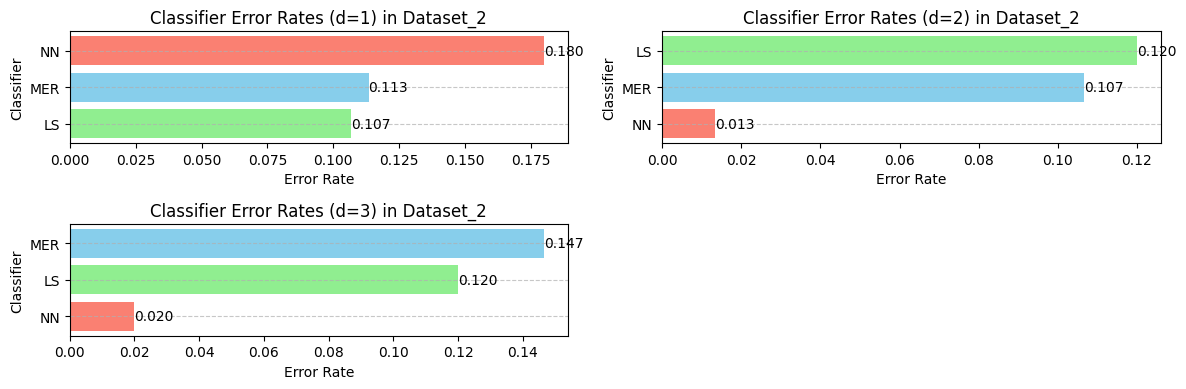

Dataset_3


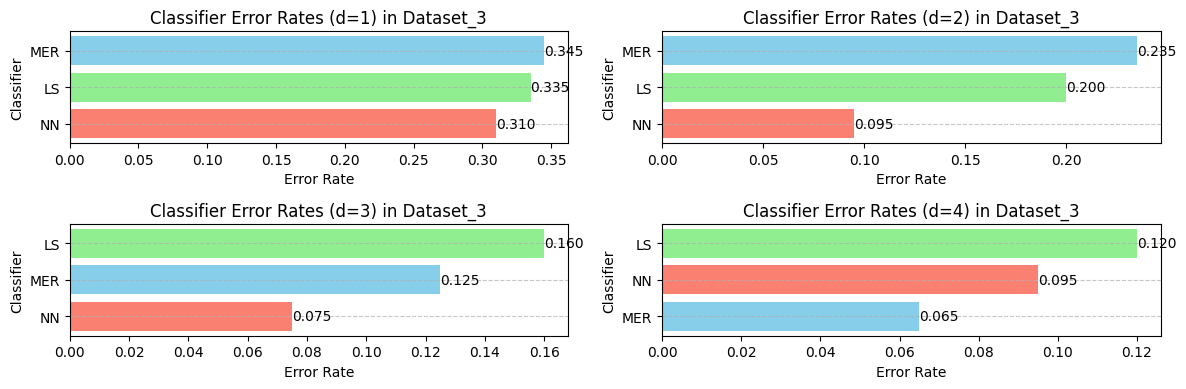

In [52]:
classifier_colors = {
    'MER': 'skyblue',
    'LS': 'lightgreen',
    'NN': 'salmon'
}

for name, file_path in datasets.items():
    print(f"{name}")
    X, y = load_dataset(file_path)
    num_features = X.shape[1]
    
    # Feature combination rankings based on Nearest Neighbor
    feature_rankings = {}
    for d in range(1, num_features + 1):
        combinations = list(itertools.combinations(range(num_features), d))
        error_list = []
        for combo in combinations:
            errors = evaluate_classifiers(X, y, combo)
            error_nn = errors['NN']
            error_list.append({'features': combo, 'error_NN': error_nn})
        
        sorted_errors = sorted(error_list, key=lambda x: x['error_NN'])
        feature_rankings[d] = sorted_errors

    # Classifier rankings for best feature combinations
    num_plots = len(feature_rankings)
    cols = 2  
    rows = (num_plots + cols - 1) // cols 
    fig, axes = plt.subplots(rows, cols, figsize=(12, 2 * rows))
    axes = axes.flatten()

    for idx, (d, sorted_errors) in enumerate(feature_rankings.items()):
        best_features = sorted_errors[0]['features']
        errors = evaluate_classifiers(X, y, best_features)
        sorted_classifiers = sorted(errors.items(), key=lambda x: x[1])
        classifier_names = [clf[0] for clf in sorted_classifiers]
        error_rates = [clf[1] for clf in sorted_classifiers]
        colors = [classifier_colors[clf[0]] for clf in sorted_classifiers]

        ax = axes[idx]
        bars = ax.barh(classifier_names, error_rates, color=colors)
        ax.set_title(f'Classifier Error Rates (d={d}) in {name}')
        ax.set_xlabel('Error Rate')
        ax.set_ylabel('Classifier')
        ax.grid(True, axis='y', linestyle='--', alpha=0.7)
        

        for bar, error_rate in zip(bars, error_rates):
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2, f'{error_rate:.3f}', 
                    ha='left', va='center', fontsize=10)
 


    for idx in range(len(feature_rankings), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

#### 6 Conclusion
1. **Why is it reasonable to use the nearest neighbor classifier to find favorable feature combinations?**

The nearest neighbor classifier is non-parametric and makes minimal assumptions about the data distribution. This flexibility allows it to effectively evaluate the impact of different feature combinations on classification performance, identifying combinations that result in lower error rates without being constrained by predefined model structures.

2. **Why might it be reasonable in a practical application to find a linear or quadratic classifier to replace the nearest neighbor classifier?**

Linear and quadratic classifiers are computationally more efficient, especially with large datasets, and often require less memory. Additionally, they provide explicit decision boundaries that are easier to interpret and implement in real-time applications. These classifiers can generalize better to unseen data and are less sensitive to noise compared to nearest neighbor classifiers.

3. **Why is it unfavorable to use the same dataset both for training and evaluation of a classifier?**

Using the same dataset for both training and evaluation can lead to overfitting, where the classifier learns the noise and specific patterns of the training data instead of the underlying generalizable trends. This results in artificially low error rates during evaluation, which do not reflect the classifier's performance on new, unseen data.

4. **Why does a linear classifier give poor results for dataset 2?**

A linear classifier is performing poorly on dataset 2 becasue upon inspection of the data. It is poorly linearly separable, meaning that no straight line can effectively separate the classes. 
We can see from the figure bellow that for Feature 1 against Feature 2 and Feature 2 against Feature 3, the classes is  cannot be effectively separated by a straight line. It is especially evident in the Feature 2 against Feature 3 plot where the classes are overlapping and intermingled. This makes it difficult for a linear classifier to accurately distinguish between the classes, leading to poor classification performance. On the other hand, NN seem to did a well job on this dataset having very low error rate compared to the other classifiers.


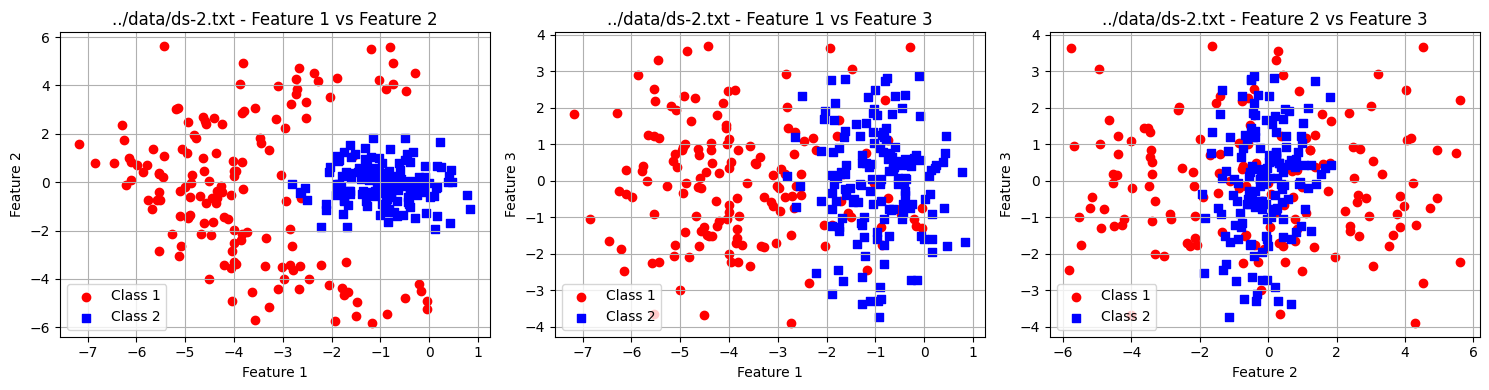

In [54]:
plot_all_feature_combinations(datasets['Dataset_2'])